$$  [X | Y=y_k] \sim N[m_k,\Sigma] $$

In [112]:
import pandas as pd
import sklearn as skl
import sklearn.model_selection as skl_model_selection
import sklearn.linear_model as skl_linear_mdl
import sklearn.ensemble as skl_ensemble_mdl
import sklearn.discriminant_analysis as skl_discriminant_analysis
import sklearn.metrics as skl_metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from statistics import mean 
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt


df_titanic_train = pd.read_csv(r"C:/Users/Alexandre/ProjetLamberton/Projet-ArchitectureBigData/Kaggle/train.csv")
df_titanic_test = pd.read_csv(r"C:/Users/Alexandre/ProjetLamberton/Projet-ArchitectureBigData/Kaggle/test.csv")
df_titanic=df_titanic_train

#missing_index = list(df_titanic["Age"][df_titanic["Age"].isnull()].index)

#for i in missing_index :
#    median_age = df_titanic["Age"].median()
#    filled_age = df_titanic["Age"][((df_titanic['Sex'] == df_titanic.iloc[i]["Sex"]) & 
#                                (df_titanic['SibSp'] == df_titanic.iloc[i]["SibSp"]) & 
#                                (df_titanic['Parch'] == df_titanic.iloc[i]["Parch"]) & 
#                                (df_titanic['Pclass'] == df_titanic.iloc[i]["Pclass"]))].median()
#    if not np.isnan(filled_age) :
#        df_titanic['Age'].iloc[i] = filled_age
#    else :
#        df_titanic['Age'].iloc[i] = median_age
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].median())
cpt_row=0
for row_titanic in df_titanic["Age"]:
    if row_titanic<10 :
            df_titanic.loc[[cpt_row], ['Age']]=0
    elif row_titanic>=10 and row_titanic<40:
            df_titanic.loc[[cpt_row], ['Age']]=1
    elif row_titanic>40:
            df_titanic.loc[[cpt_row], ['Age']]=2
    cpt_row=cpt_row+1


df_titanic = pd.get_dummies(df_titanic, columns = ["Sex"])
df_titanic["Embarked"] = df_titanic["Embarked"].fillna("S")
df_titanic = pd.get_dummies(df_titanic, columns = ["Embarked"], prefix="Emb")
cpt_row=0
for row_titanic in df_titanic["Cabin"]:
    if str(row_titanic)=="":
        df_titanic.loc[[cpt_row], ['Cabin']]=0
    elif str(row_titanic)[0]=="A":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="B":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="C":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="D":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="E":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="F":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="G":
            df_titanic.loc[[cpt_row], ['Cabin']]=1
    else:
        df_titanic.loc[[cpt_row], ['Cabin']]=0
    cpt_row=cpt_row+1
    
df_titanic = pd.get_dummies(df_titanic, columns = ["Cabin"])
cpt_row=0
df_titanic["Fare"]=df_titanic["Fare"].astype("float")

df_titanic["Fare"] = df_titanic["Fare"].fillna(df_titanic["Fare"].median())
df_titanic["Fare"] = np.log1p(df_titanic["Fare"])
#for row_titanic in df_titanic["Fare"]:
#    if row_titanic<10:
#        df_titanic.loc[[cpt_row], ['Fare']]=0
#    elif row_titanic>=10 and  row_titanic<50 :
#            df_titanic.loc[[cpt_row], ['Fare']]=1
#    elif row_titanic>50:
#            df_titanic.loc[[cpt_row], ['Fare']]=2
#    else:
#            df_titanic.loc[[cpt_row], ['Fare']]=0
#    cpt_row=cpt_row+1

            
df_titanic["FamiliySize"]=df_titanic["SibSp"]+df_titanic["Parch"]+1

df_titanic['Single'] = df_titanic['FamiliySize'].map(lambda s: 1 if s == 1 else 0)
df_titanic['SmallF'] = df_titanic['FamiliySize'].map(lambda s: 1 if  s == 2  else 0)
df_titanic['MedF'] = df_titanic['FamiliySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_titanic['LargeF'] = df_titanic['FamiliySize'].map(lambda s: 1 if s >= 5 else 0)

cpt_row=0
for row_titanic in df_titanic["Ticket"]:
    if row_titanic.isdigit()==True:
        df_titanic.loc[[cpt_row], ['Ticket']]=0
    else:
        df_titanic.loc[[cpt_row], ['Ticket']]=1
    cpt_row=cpt_row+1
df_titanic = pd.get_dummies(df_titanic, columns = ["Ticket"])


salutation = [i.split(",")[1].split(".")[0].strip() for i in df_titanic["Name"]]
df_titanic["Title"] = pd.Series(salutation)
df_titanic["Title"].unique()
df_titanic["Title"] = df_titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_titanic["Title"] = df_titanic["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_titanic["Title"] = df_titanic["Title"].astype(int)

df_titanic=df_titanic.drop("Name", axis=1)

df_titanic['Age*Class'] = df_titanic.Age * df_titanic.Pclass

print(df_titanic.head())

        



   PassengerId  Survived  Pclass  Age  SibSp  Parch      Fare  Sex_female  \
0            1         0       3  1.0      1      0  2.110213           0   
1            2         1       1  1.0      1      0  4.280593           1   
2            3         1       3  1.0      0      0  2.188856           1   
3            4         1       1  1.0      1      0  3.990834           1   
4            5         0       3  1.0      0      0  2.202765           0   

   Sex_male  Emb_C    ...      Cabin_1  FamiliySize  Single  SmallF  MedF  \
0         1      0    ...            0            2       0       1     0   
1         0      1    ...            1            2       0       1     0   
2         0      0    ...            0            1       1       0     0   
3         0      0    ...            1            2       0       1     0   
4         1      0    ...            0            1       1       0     0   

   LargeF  Ticket_0  Ticket_1  Title  Age*Class  
0       0         0     

In [113]:
def print_confusion_matrix(confusion_matrix):
    plt.figure()
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=0.3, cmap = 'Blues');
    plt.ylabel('True Label');
    plt.xlabel('Predicted Label');
    plt.title("Score de Prediction : " + str(score))
    plt.show()  
def get_roc_curve(Y_test,proba_Y,predicted_Y,classe_name): 
    # False Positive Rate
    fpr_cl = dict()
    # True Positive Rate
    tpr_cl = dict()
    fpr_cl[classe_name[0]], tpr_cl[classe_name[0]], _ = \
        skl_metrics.roc_curve(Y_test == 0, proba_Y[:, 0].ravel())
    fpr_cl[classe_name[1]], tpr_cl[classe_name[1]], _ = \
        skl_metrics.roc_curve(Y_test, proba_Y[:, 1].ravel())

    prob_pred = np.array([proba_Y[i, 1 if c else 0]
                         for i, c in enumerate(predicted_Y)])
    
    fpr_cl[classe_name[2]], tpr_cl[classe_name[2]], _ = \
    skl_metrics.roc_curve((predicted_Y == Y_test).ravel(), prob_pred)
    
    # Affichage de la Courbe ROC
    plt.figure()
    for key in fpr_cl:
        plt.plot(fpr_cl[key], tpr_cl[key], label=key)
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Proportion mal classée")
    plt.ylabel("Proportion bien classée")
    plt.title('ROC(s) avec predict_proba')
    plt.legend(loc="lower right")
    return(fpr_cl[classe_name[2]], tpr_cl[classe_name[2]])
    

In [114]:
df_train, df_test = skl_model_selection.train_test_split(df_titanic)
X=df_titanic.iloc[:, 2:]
Y = df_titanic["Survived"]
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# On split le dataset en train-set et test-set
X_train = df_train.iloc[:, 2:]
#Y_train = df_train["Target"]
Y_train = df_train["Survived"]
X_test = df_test.iloc[:, 2:]
#Y_test = df_test["Target"]
Y_test = df_test["Survived"]


0.8215318919532403


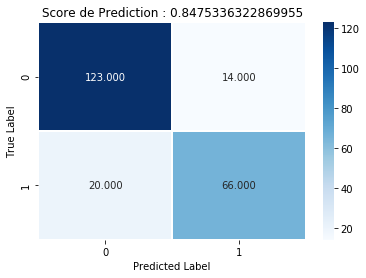

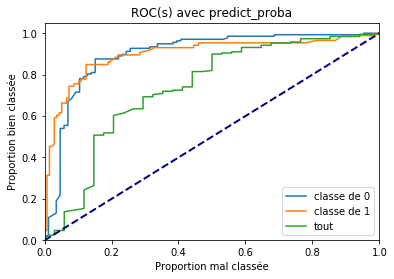

In [115]:
import seaborn as sns
log_reg = skl_linear_mdl.LogisticRegression()
log_reg.fit(X_train, Y_train)
score = log_reg.score(X_test, Y_test)
predicted_Y = log_reg.predict(X_test)
proba_Y = log_reg.predict_proba(X_test)

scores = cross_val_score(log_reg, X, Y, cv=10)
print(mean(scores))

confusion_matrix = skl_metrics.confusion_matrix(Y_test, predicted_Y)
print_confusion_matrix(confusion_matrix)
frp_global=[]
tpr_global=[]
AUC_global=dict()

fpr_global=dict()
tpr_global=dict()
fpr_global["Regression Logistique"],tpr_global["Regression Logistique"] =  \
    get_roc_curve(Y_test, proba_Y, predicted_Y, ["classe de 0","classe de 1","tout"])
AUC_global["Regression Logistique"] = \
    skl_metrics.auc(fpr_global["Regression Logistique"],tpr_global["Regression Logistique"])

            importance
Fare          0.253910
Title         0.172858
Sex_female    0.098394
Pclass        0.074242
Sex_male      0.064441
0.8013809442742027


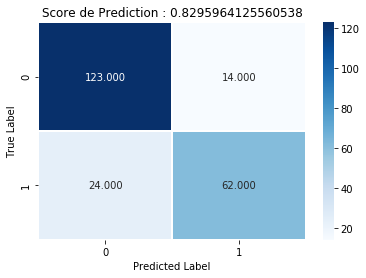

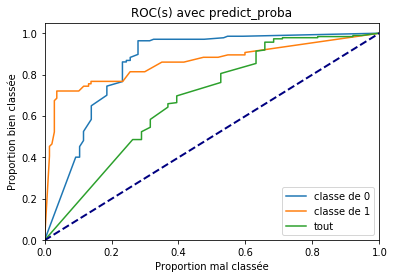

In [116]:
random_forest = skl_ensemble_mdl.RandomForestClassifier()
random_forest.fit(X_train, Y_train)
score = random_forest.score(X_test, Y_test)
predicted_Y = random_forest.predict(X_test)
proba_Y = random_forest.predict_proba(X_test)
true_Y = Y_test


feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head())

scores = cross_val_score(random_forest, X, Y, cv=10)
print(mean(scores))
confusion_matrix = skl_metrics.confusion_matrix(true_Y, predicted_Y)
print_confusion_matrix(confusion_matrix)

fpr_global["Random Forest"], tpr_global["Random Forest"] = \
    get_roc_curve(Y_test, proba_Y, predicted_Y, ["classe de 0","classe de 1","tout"])
AUC_global["Random Forest"] = \
    skl_metrics.auc(fpr_global["Random Forest"], tpr_global["Random Forest"])

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

0.8271498694813302


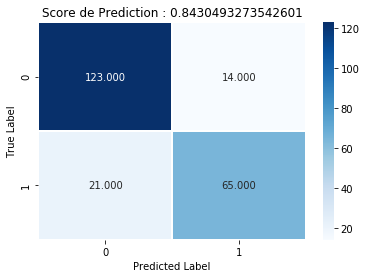

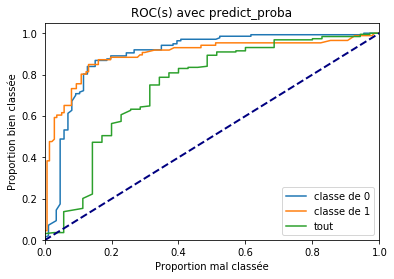

In [117]:
lda = skl_discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
score = lda.score(X_test, Y_test)
predicted_Y = lda.predict(X_test)
proba_Y=lda.predict_proba(X_test)
true_Y = Y_test

scores = cross_val_score(lda, X, Y, cv=10)
print(mean(scores))

confusion_matrix = skl_metrics.confusion_matrix(true_Y, predicted_Y)
print_confusion_matrix(confusion_matrix)

fpr_global["ald"],tpr_global["ald"]=get_roc_curve(Y_test,proba_Y,predicted_Y,["classe de 0","classe de 1","tout"])
AUC_global["ald"]=auc(fpr_global["ald"],tpr_global["ald"])

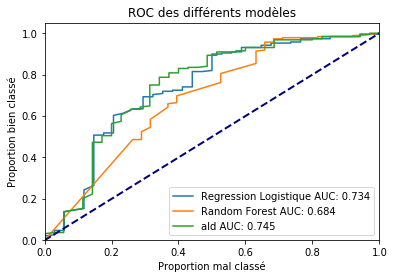

In [118]:
###Print des 3 ROC sur un même graph
for key in fpr_global:
    plt.plot(fpr_global[key], tpr_global[key], label=key +" AUC: " + str(round(AUC_global[key],3)))

lw = 2

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classé")
plt.ylabel("Proportion bien classé")
plt.title('ROC des différents modèles')
plt.legend(loc="lower right")

### Construction d'un Datset ROC pour visualiser les résultats dans Kibana

In [28]:
df_roc_rf = pd.DataFrame()
df_roc_logit = pd.DataFrame()
df_roc_ald = pd.DataFrame()
fpr = list(fpr_global.values())
fpr_logit = fpr[0]
fpr_rf = fpr[1]
fpr_ald = fpr[2]

tpr = list(tpr_global.values())
tpr_logit = tpr[0]
tpr_rf = tpr[1]
tpr_ald = tpr[2]

df_roc_logit["FPR_LOGIT"] = fpr_logit
df_roc_logit["TPR_LOGIT"] = tpr_logit
df_roc_rf["FPR_RF"] = fpr_rf
df_roc_rf["TPR_RF"] = tpr_rf
df_roc_ald["FPR_ALD"] = fpr_ald
df_roc_ald["TPR_ALD"] = tpr_ald

df_roc = df_roc_logit.join(df_roc_rf).join(df_roc_ald)

# On remplace les NaN à la fin de certaines colonnes par 1 : 
# c'est la dernière valeur de chaque colonne 
df_roc = df_roc.fillna(1)

df_roc.head()

,FPR_LOGIT,TPR_LOGIT,FPR_RF,TPR_RF,FPR_ALD,TPR_ALD
0,0.000000,0.005650,0.00,0.000000,0.000000,0.005650
1,0.000000,0.039548,0.18,0.485549,0.000000,0.084746
2,0.021739,0.039548,0.18,0.491329,0.021739,0.084746
3,0.021739,0.050847,0.20,0.520231,0.021739,0.096045
4,0.043478,0.056497,0.22,0.537572,0.043478,0.101695


In [119]:
#####Kaggle

###Do the same for the test set
#missing_index = list(df_titanic_test["Age"][df_titanic_test["Age"].isnull()].index)

#for i in missing_index :
#    median_age = df_titanic_test["Age"].median()
#    filled_age = df_titanic_test["Age"][((df_titanic_test['Sex'] == df_titanic_test.iloc[i]["Sex"]) & 
#                                (df_titanic_test['SibSp'] == df_titanic_test.iloc[i]["SibSp"]) & 
#                                (df_titanic_test['Parch'] == df_titanic_test.iloc[i]["Parch"]) & 
#                                (df_titanic_test['Pclass'] == df_titanic_test.iloc[i]["Pclass"]))].median()
#    if not np.isnan(filled_age) :
#        df_titanic_test['Age'].iloc[i] = filled_age
#    else :
#        df_titanic_test['Age'].iloc[i] = median_age
df_titanic_test["Age"] = df_titanic_test["Age"].fillna(df_titanic_test["Age"].median())
cpt_row=0
for row_titanic in df_titanic_test["Age"]:
    if row_titanic<10 :
            df_titanic_test.loc[[cpt_row], ['Age']]=0
    elif row_titanic>=10 and row_titanic<40:
            df_titanic_test.loc[[cpt_row], ['Age']]=1
    elif row_titanic>40:
            df_titanic_test.loc[[cpt_row], ['Age']]=2
    cpt_row=cpt_row+1

df_titanic_test = pd.get_dummies(df_titanic_test, columns = ["Sex"])
df_titanic_test["Embarked"] = df_titanic_test["Embarked"].fillna("S")
df_titanic_test = pd.get_dummies(df_titanic_test, columns = ["Embarked"], prefix="Emb")
cpt_row=0
for row_titanic in df_titanic_test["Cabin"]:
    if str(row_titanic)=="":
        df_titanic_test.loc[[cpt_row], ['Cabin']]=0
    elif str(row_titanic)[0]=="A":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="B":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="C":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="D":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="E":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="F":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    elif str(row_titanic)[0]=="G":
            df_titanic_test.loc[[cpt_row], ['Cabin']]=1
    else:
        df_titanic_test.loc[[cpt_row], ['Cabin']]=0
    cpt_row=cpt_row+1
df_titanic_test = pd.get_dummies(df_titanic_test, columns = ["Cabin"])
cpt_row=0
for row_titanic in df_titanic_test["Ticket"]:
    if row_titanic.isdigit()==True:
        df_titanic_test.loc[[cpt_row], ['Ticket']]=0
    else:
        df_titanic_test.loc[[cpt_row], ['Ticket']]=1
    cpt_row=cpt_row+1
    
df_titanic_test = pd.get_dummies(df_titanic_test, columns = ["Ticket"])
   

    
cpt_row=0
df_titanic_test["Fare"]=df_titanic_test["Fare"].astype("float")

df_titanic_test["Fare"] = df_titanic_test["Fare"].fillna(df_titanic_test["Fare"].median())
df_titanic_test["Fare"] = np.log1p(df_titanic_test["Fare"])
#for row_titanic in df_titanic_test["Fare"]:
#    if row_titanic<10:
#        df_titanic_test.loc[[cpt_row], ['Fare']]=0
#    elif row_titanic>=10 and  row_titanic<50 :
#            df_titanic_test.loc[[cpt_row], ['Fare']]=1
#    elif row_titanic>50:
#            df_titanic_test.loc[[cpt_row], ['Fare']]=2
#    else:
#            df_titanic_test.loc[[cpt_row], ['Fare']]=0
#    cpt_row=cpt_row+1

            
df_titanic_test["FamiliySize"]=df_titanic_test["SibSp"]+df_titanic_test["Parch"]+1
df_titanic_test['Single'] = df_titanic_test['FamiliySize'].map(lambda s: 1 if s == 1 else 0)
df_titanic_test['SmallF'] = df_titanic_test['FamiliySize'].map(lambda s: 1 if  s == 2  else 0)
df_titanic_test['MedF'] = df_titanic_test['FamiliySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_titanic_test['LargeF'] = df_titanic_test['FamiliySize'].map(lambda s: 1 if s >= 5 else 0)

#Test Set


##Test Set
salutation = [i.split(",")[1].split(".")[0].strip() for i in df_titanic_test["Name"]]
df_titanic_test["Title"] = pd.Series(salutation)
df_titanic_test["Title"].unique()
df_titanic_test["Title"] = df_titanic_test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_titanic_test["Title"] = df_titanic_test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_titanic_test["Title"] = df_titanic_test["Title"].astype(int)
df_titanic_test=df_titanic_test.drop("Name", axis=1)

df_titanic_test['Age*Class'] = df_titanic_test.Age * df_titanic_test.Pclass 

#df_titanic_test = pd.get_dummies(df_titanic_test, columns = ["Age"])
df_titanic_test=df_titanic_test.dropna()
print(df_titanic_test.head())

   PassengerId  Pclass  Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0          892       3  1.0      0      0  2.178064           0         1   
1          893       3  2.0      1      0  2.079442           1         0   
2          894       2  2.0      0      0  2.369075           0         1   
3          895       3  1.0      0      0  2.268252           0         1   
4          896       3  1.0      1      1  2.586824           1         0   

   Emb_C  Emb_Q    ...      Cabin_1  Ticket_0  Ticket_1  FamiliySize  Single  \
0      0      1    ...            0         1         0            1       1   
1      0      0    ...            0         1         0            2       0   
2      0      1    ...            0         1         0            1       1   
3      0      0    ...            0         1         0            1       1   
4      0      0    ...            0         1         0            3       0   

   SmallF  MedF  LargeF  Title  Age*Class  
0       0   

In [120]:
##If I print on Kaggle
X=df_titanic
Y = df_titanic["Survived"]

X_train = df_titanic
Y_train = df_titanic["Survived"]
X_test = df_titanic_test
#Y_test = df_titanic_test["Survived"]

In [108]:
##For Kaggle

import seaborn as sns
features = ['Cabin_0','Cabin_1','Single','SmallF','MedF','LargeF','Age*Class' ,'Age','Ticket_0','Ticket_1','Pclass','SibSp','Parch','Fare' , 'Sex_female','Sex_male','Emb_C' ,'Emb_Q','Emb_S','FamiliySize','Title']
log_reg = skl_linear_mdl.LogisticRegression()
log_reg.fit(X_train[features], Y_train)
#score = log_reg.score(X_test, Y_test)
predicted_Y = log_reg.predict(X_test[features])
#proba_Y = log_reg.predict_proba(X_test)
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: Titanic Predictions 1.csv


In [160]:
random_forest = skl_ensemble_mdl.RandomForestClassifier()
random_forest.fit(X_train[features], Y_train)
predicted_Y = random_forest.predict(X_test[features])
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions .csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


Saved file: Titanic Predictions .csv


In [109]:
##For Kaggle
lda = skl_discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train[features], Y_train)
predicted_Y = lda.predict(X_test[features])

submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions 3.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)




Saved file: Titanic Predictions 3.csv


C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [110]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[features],Y_train)
predicted_y=decision_tree.predict(X_test[features])
#print(len(X_test))
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_y})
filename = 'Titanic Predictions 4.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


Saved file: Titanic Predictions 4.csv
